**Investigating the Adoption of Research Software**

Category: Software Usage and Disclosure

Profile: Developers

Factor Analysis

***1) Import Required Libraries***

In [1]:
%matplotlib inline

import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from functools import reduce
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statistics as s
import scipy.stats as stats
from scipy.stats import ttest_ind


***2) Loading and Preprocessing Data***

In [2]:
from google.colab import files
import io
uploaded = files.upload()


Saving Survey_Perfil_Todos_Usuario_e_Desenvolvedor.xlsx to Survey_Perfil_Todos_Usuario_e_Desenvolvedor.xlsx


In [3]:
file_name = next(iter(uploaded))
file_name

'Survey_Perfil_Todos_Usuario_e_Desenvolvedor.xlsx'

In [4]:
df = pd.read_excel(file_name)

df

,PERFIL,TEMPO_USO,FREQUENCIA_USO,IDADE,GENERO,FORMACAO,ANOS_EXPERIENCIA,UTILIZACAO_D01F01,UTILIZACAO_D01F02,UTILIZACAO_D01F03,...,QUALIDADE_D02F07,QUALIDADE_D02F08,NAO_ADOCAO_D03F01,NAO_ADOCAO_D03F02,NAO_ADOCAO_D03F03,NAO_ADOCAO_D03F04,NAO_ADOCAO_D03F05,NAO_ADOCAO_D03F06,NAO_ADOCAO_D03F07,NAO_ADOCAO_D03F08
0,1.0,3.0,3.0,2.0,1.0,4.0,3.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,1.0,4.0,4.0,1.0,2.0,4.0,2.0,4.0,2.0,3.0,...,2.0,2.0,4.0,5.0,2.0,4.0,2.0,3.0,4.0,3.0
2,1.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,5.0,4.0,...,5.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,5.0,4.0
3,1.0,2.0,3.0,3.0,1.0,4.0,2.0,4.0,3.0,4.0,...,4.0,4.0,5.0,4.0,5.0,5.0,3.0,3.0,5.0,3.0
4,1.0,1.0,5.0,3.0,1.0,4.0,2.0,5.0,3.0,5.0,...,4.0,5.0,5.0,5.0,3.0,4.0,2.0,5.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0,3.0,4.0,...,4.0,4.0,5.0,5.0,4.0,4.0,3.0,0.0,4.0,4.0
169,2.0,2.0,3.0,2.0,2.0,4.0,2.0,4.0,3.0,5.0,...,2.0,4.0,5.0,5.0,4.0,4.0,2.0,3.0,2.0,4.0
170,2.0,1.0,3.0,1.0,2.0,2.0,2.0,3.0,2.0,4.0,...,4.0,5.0,4.0,5.0,3.0,4.0,3.0,2.0,4.0,4.0
171,2.0,4.0,3.0,2.0,2.0,5.0,3.0,4.0,4.0,5.0,...,4.0,5.0,5.0,5.0,5.0,5.0,1.0,2.0,5.0,5.0


***3) Category: Software Usage and Disclosure***

D01F01 - Be widely used within the academy

D01F02 - Be widely used outside academia

D01F03 - Have comprehensive documentation in different media for the user

D01F04 - Have clear and consistent documentation for using the software

D01F05 - Be widely cited in scientific articles

D01F06 - Have articles published about the software

D01F07 - Be publicized in social networks, events and media

D01F08 - Be recognized as a reference for the research area

Total of respondents users = 143

Total of respondents developers = 30

In [5]:
print("Profile: Users")

# Selecting columns
df1 = df.loc[df['PERFIL'] == 1.0, lambda df:['UTILIZACAO_D01F01', 'UTILIZACAO_D01F02', 'UTILIZACAO_D01F03', 'UTILIZACAO_D01F04', 'UTILIZACAO_D01F05', 'UTILIZACAO_D01F06', 'UTILIZACAO_D01F07', 'UTILIZACAO_D01F08' ]]
df1.columns = ['D01F01', 'D01F02','D01F03', 'D01F04', 'D01F05', 'D01F06', 'D01F07', 'D01F08']
df1_fa = df1

df1



Profile: Users


,D01F01,D01F02,D01F03,D01F04,D01F05,D01F06,D01F07,D01F08
0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,4.0,2.0,3.0,5.0,1.0,1.0,1.0,3.0
2,2.0,5.0,4.0,4.0,4.0,3.0,1.0,4.0
3,4.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0
4,5.0,3.0,5.0,5.0,2.0,2.0,4.0,4.0
...,...,...,...,...,...,...,...,...
138,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
139,2.0,2.0,4.0,4.0,1.0,1.0,1.0,1.0
140,4.0,2.0,5.0,5.0,5.0,5.0,3.0,5.0
141,2.0,4.0,2.0,4.0,2.0,2.0,2.0,2.0


In [6]:
print ("Profile: Developers")
df2 = df.loc[df['PERFIL'] == 2.0, lambda df:['UTILIZACAO_D01F01', 'UTILIZACAO_D01F02', 'UTILIZACAO_D01F03', 'UTILIZACAO_D01F04', 'UTILIZACAO_D01F05', 'UTILIZACAO_D01F06', 'UTILIZACAO_D01F07', 'UTILIZACAO_D01F08' ]]
df2.columns = ['D01F01', 'D01F02','D01F03', 'D01F04', 'D01F05', 'D01F06', 'D01F07', 'D01F08']
df2_fa = df2

df2

Profile: Developers


,D01F01,D01F02,D01F03,D01F04,D01F05,D01F06,D01F07,D01F08
143,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
144,3.0,1.0,2.0,4.0,3.0,2.0,1.0,2.0
145,4.0,2.0,5.0,5.0,3.0,3.0,2.0,3.0
146,5.0,4.0,4.0,5.0,4.0,4.0,2.0,5.0
147,5.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0
148,4.0,4.0,4.0,5.0,3.0,3.0,4.0,3.0
149,4.0,4.0,4.0,4.0,5.0,5.0,3.0,5.0
150,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0
151,4.0,3.0,3.0,2.0,2.0,3.0,4.0,5.0
152,4.0,2.0,5.0,3.0,1.0,4.0,1.0,4.0


---

**3.1) Factor Analysis Test**




**Profile:** Developers


---




**a) Bartlett’s Test of Sphericity**


In [7]:
df_orig = df2_fa

df2_fa

,D01F01,D01F02,D01F03,D01F04,D01F05,D01F06,D01F07,D01F08
143,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
144,3.0,1.0,2.0,4.0,3.0,2.0,1.0,2.0
145,4.0,2.0,5.0,5.0,3.0,3.0,2.0,3.0
146,5.0,4.0,4.0,5.0,4.0,4.0,2.0,5.0
147,5.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0
148,4.0,4.0,4.0,5.0,3.0,3.0,4.0,3.0
149,4.0,4.0,4.0,4.0,5.0,5.0,3.0,5.0
150,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0
151,4.0,3.0,3.0,2.0,2.0,3.0,4.0,5.0
152,4.0,2.0,5.0,3.0,1.0,4.0,1.0,4.0


In [8]:
pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 529 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 7.3 MB/s 
     |████████████████████████████████| 98 kB 7.6 MB/s 
     |████████████████████████████████| 8.8 MB 48.4 MB/s 
     |████████████████████████████████| 468 kB 38.7 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=2cc70a3c63d123c710e192829bd4853b895c7c5b311f6996eac03ac4be54498e
  Stored in directory: /root/.cache/pip/wheels/ed/90/48/766e09628cc5bbcf57c2eb063972c1e956a03422dd6d84fde2
Successfully built factor-analyzer


Bartlett’s test checks whether the correlation is present in the given data. It tests the null hypothesis (H0) that the correlation matrix is an Identical matrix. The identical matrix consists of all the diagonal elements as 1. So, the null hypothesis assumes that no correlation is present among the variables.

We want to reject this null hypothesis because factor analysis aims at explaining the common variance i.e. the variation due to correlation among the variables. If the p test statistic value is less than 0.05, we can decide that the correlation is not an Identical matrix i.e. correlation is present among the variables with a 95% confidence level.

In [9]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi2,p = calculate_bartlett_sphericity(df2_fa)

print('Bartlett-sphericity Chi-square: {}'.format(calculate_bartlett_sphericity(df2_fa)[0]))
print('Bartlett-sphericity P-value: {}'.format(calculate_bartlett_sphericity(df2_fa)[1]))

p = df2_fa.shape[1]
ddl = p * (p - 1) / 2
print('Bartlett-sphericity Freedom Degree: {}'.format(ddl))

Bartlett-sphericity Chi-square: 100.3565778547518
Bartlett-sphericity P-value: 4.4329680680396495e-10
Bartlett-sphericity Freedom Degree: 28.0


**b) Kaiser-Meyer-Olkin (KMO) Test**

The KMO statistic represents the degree to which each observed variable is predicted, without error, by the other variables in the dataset. In general, a KMO < 0.6 is considered inadequate.

In [10]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_vars,kmo_model = calculate_kmo(df2_fa)

print(kmo_model)

0.6786459423530603


**c) Determining the number of factors**

The number of factors in our dataset is equal to the number of variables in our dataset. All the factors are not gonna provide a significant amount of useful information about the common variance among the variables. So we have to decide the number of factors. The number of factors can be decided on the basis of the amount of common variance the factors explain. In general, we will plot the factors and their eigenvalues.

Eigenvalues are nothing but the amount of variance the factor explains. We will select the number of factors whose eigenvalues are greater than 1.

But why should we choose the factors whose eigenvalues are greater than 1? The answer is very simple. In a standard normal distribution with mean 0 and Standard deviation 1, the variance will be 1. Since we have standard scaled the data the variance of a feature is 1. This is the reason for selecting factors whose eigenvalues(variance) are greater than 1 i.e. the factors which explain more variance than a single observed variable.

**d) Factor Analysis (FA)**

A simple linear generative model with Gaussian latent variables.

The observations are assumed to be caused by a linear transformation of lower dimensional latent factors and added Gaussian noise. Without loss of generality the factors are distributed according to a Gaussian with zero mean and unit covariance. The noise is also zero mean and has an arbitrary diagonal covariance matrix.

If we would restrict the model further, by assuming that the Gaussian noise is even isotropic (all diagonal entries are the same) we would obtain PCA.

FactorAnalysis performs a maximum likelihood estimate of the so-called loading matrix, the transformation of the latent variables to the observed ones, using SVD based approach.

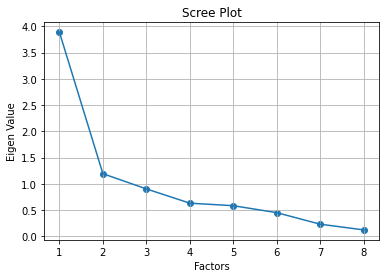

In [12]:
from factor_analyzer import FactorAnalyzer, Rotator

fa = FactorAnalyzer(rotation = 'varimax' ,impute = "drop",n_factors=df2_fa.shape[1])
fa.fit(df2_fa)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,df2_fa.shape[1]+1),ev)
plt.plot(range(1,df2_fa.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

From the graph, we can see that the eigenvalues drop below 1 from the 2th factor. So, the optimal number of factors is 3.

In contrast to PCA, the goal of FA (if it is orthogonal rotation = varimax) is to reproduce the correlation matrix with a few orthogonal factors.

**e) Interpreting the factors**

Create an optimal number of factors i.e. 6 in our case. Then, we have to interpret the factors by making use of loadings, variance, and commonalities.

In [13]:
#fa = FactorAnalyzer(n_factors=3,rotation='varimax',method='principal', is_corr_matrix=False, impute='drop', svd_method='randomized')

fa = FactorAnalyzer(n_factors=3,rotation='varimax',method='principal', use_smc=True, is_corr_matrix=False, bounds=(0.005, 1), impute='drop', svd_method='randomized', rotation_kwargs=None)
fa.fit(df2_fa)

fa_loading_matrix = pd.DataFrame(fa.loadings_, columns=['FA{}'.format(i) for i in range(1, 3+1)],index=df2_fa.columns)

fa_loading_matrix['Highest_loading'] = fa_loading_matrix.idxmax(axis=1)
fa_loading_matrix['Communality'] = fa.get_communalities()
#fa_loading_matrix = fa_loading_matrix.sort_values('Highest_loading')
fa_loading_matrix = fa_loading_matrix.sort_values('Communality', ascending=False)
fa_loading_matrix 

,FA1,FA2,FA3,Highest_loading,Communality
D01F06,0.913669,0.164124,0.206994,FA1,0.904574
D01F04,0.090762,0.928333,-0.017301,FA2,0.870339
D01F05,0.831417,0.315775,0.117268,FA1,0.804720
D01F02,0.226938,0.185620,0.826610,FA3,0.769240
D01F01,0.600867,-0.085654,0.587097,FA1,0.713060
D01F07,0.188029,0.115006,0.807317,FA3,0.700342
D01F03,0.216689,0.659316,0.396856,FA2,0.639147
D01F08,0.635294,0.013024,0.421291,FA1,0.581254


In [14]:
from factor_analyzer import FactorAnalyzer, Rotator
from sklearn.utils.extmath import randomized_svd

rotator = Rotator(method='varimax', normalize=True, power=4, kappa=0, gamma=0, delta=0.01, max_iter=1000, tol=1e-5)

fa = FactorAnalyzer(n_factors=3,rotation='varimax',method='principal', use_smc=True, is_corr_matrix=False, bounds=(0.005, 1), impute='drop', svd_method='randomized', rotation_kwargs=None)
fa.fit(df2_fa)

fa_loading_matrix = pd.DataFrame(rotator.fit_transform(fa.loadings_))

fa_loading_matrix

,0,1,2
0,0.600767,-0.085449,0.587229
1,0.226689,0.185689,0.826663
2,0.216366,0.659388,0.396913
3,0.090435,0.928365,-0.017268
4,0.831279,0.316069,0.117456
5,0.913565,0.164446,0.207198
6,0.187810,0.115061,0.807360
7,0.635196,0.013244,0.421432


In [15]:
from factor_analyzer import FactorAnalyzer, Rotator
from sklearn.utils.extmath import randomized_svd

fa = FactorAnalyzer(n_factors=3,rotation='varimax',method='principal', use_smc=True, is_corr_matrix=False, bounds=(0.005, 1), impute='drop', svd_method='randomized', rotation_kwargs=None)
fa.fit(df2_fa)


rotator = Rotator(method='varimax', normalize=True, power=4, kappa=0, gamma=0, delta=0.01, max_iter=1000, tol=1e-5)
rotator.fit_transform(fa.loadings_)

fa_loading_matrix = pd.DataFrame(rotator.fit_transform(fa.loadings_))

fa_loading_matrix = pd.DataFrame(rotator.fit_transform(fa.loadings_), columns=['FA{}'.format(i) for i in range(1, 3+1)],index=df2_fa.columns)
fa_loading_matrix['Highest_loading'] = fa_loading_matrix.idxmax(axis=1)
fa_loading_matrix['Communality'] = fa.get_communalities()
#fa_loading_matrix = fa_loading_matrix.sort_values('Highest_loading')
fa_loading_matrix = fa_loading_matrix.sort_values('Communality', ascending=False)
fa_loading_matrix



,FA1,FA2,FA3,Highest_loading,Communality
D01F06,0.913565,0.164446,0.207198,FA1,0.904574
D01F04,0.090435,0.928365,-0.017268,FA2,0.870339
D01F05,0.831279,0.316069,0.117456,FA1,0.804720
D01F02,0.226689,0.185689,0.826663,FA3,0.769240
D01F01,0.600767,-0.085449,0.587229,FA1,0.713060
D01F07,0.187810,0.115061,0.807360,FA3,0.700342
D01F03,0.216366,0.659388,0.396913,FA2,0.639147
D01F08,0.635196,0.013244,0.421432,FA1,0.581254


This table contains the rotated factor loadings, which represent both how the variables are weighted for each factor but also the correlation between the variables and the factor.  Because these are correlations, possible values range from -1 to +1.  We used the option blank (.40), which tells code not to print any of the correlations that are .4 or less.  This makes the output easier to read by removing the clutter of low correlations that are probably not meaningful anyway.


Communalitie is the h2 and can be defined as the sum of squared factor loadings for the variables.

In [16]:
df_7 = fa_loading_matrix

df_7.loc[df_7['FA1'] < 0.4, "FA1" ] = 0.0
df_7.loc[df_7['FA2'] < 0.4, "FA2" ] = 0.0
df_7.loc[df_7['FA3'] < 0.4, "FA3" ] = 0.0


cols_to_sum = ['FA1', 'FA2', 'FA3']
df_7['New Communality'] = (df_7[cols_to_sum]**2).sum(axis = 1)

df_7 = df_7.sort_values('New Communality', ascending=False)

print("We used the option blank which tells code not to print any of the correlations that are 0.4 or less. ")

#df_7.drop('Communality', axis=1, inplace=True)

df_7

We used the option blank which tells code not to print any of the correlations that are 0.4 or less. 


,FA1,FA2,FA3,Highest_loading,Communality,New Communality
D01F04,0.000000,0.928365,0.000000,FA2,0.870339,0.861862
D01F06,0.913565,0.000000,0.000000,FA1,0.904574,0.834600
D01F01,0.600767,0.000000,0.587229,FA1,0.713060,0.705759
D01F05,0.831279,0.000000,0.000000,FA1,0.804720,0.691024
D01F02,0.000000,0.000000,0.826663,FA3,0.769240,0.683372
D01F07,0.000000,0.000000,0.807360,FA3,0.700342,0.651830
D01F08,0.635196,0.000000,0.421432,FA1,0.581254,0.581078
D01F03,0.000000,0.659388,0.000000,FA2,0.639147,0.434792


D01F01 - Be widely used within the academy

D01F02 - Be widely used outside academia

D01F03 - Have comprehensive documentation in different media for the user

D01F04 - Have clear and consistent documentation for using the software

D01F05 - Be widely cited in scientific articles

D01F06 - Have articles published about the software

D01F07 - Be publicized in social networks, events and media

D01F08 - Be recognized as a reference for the research area

In [17]:
communalities = pd.DataFrame (fa.get_communalities(), index=list(df2_fa.columns))
feat = list(communalities[communalities[0] > 0.2].index)
print ('Total variable/features with communalities > 0.2 is {}'.format(len(feat)))

Total variable/features with communalities > 0.2 is 8


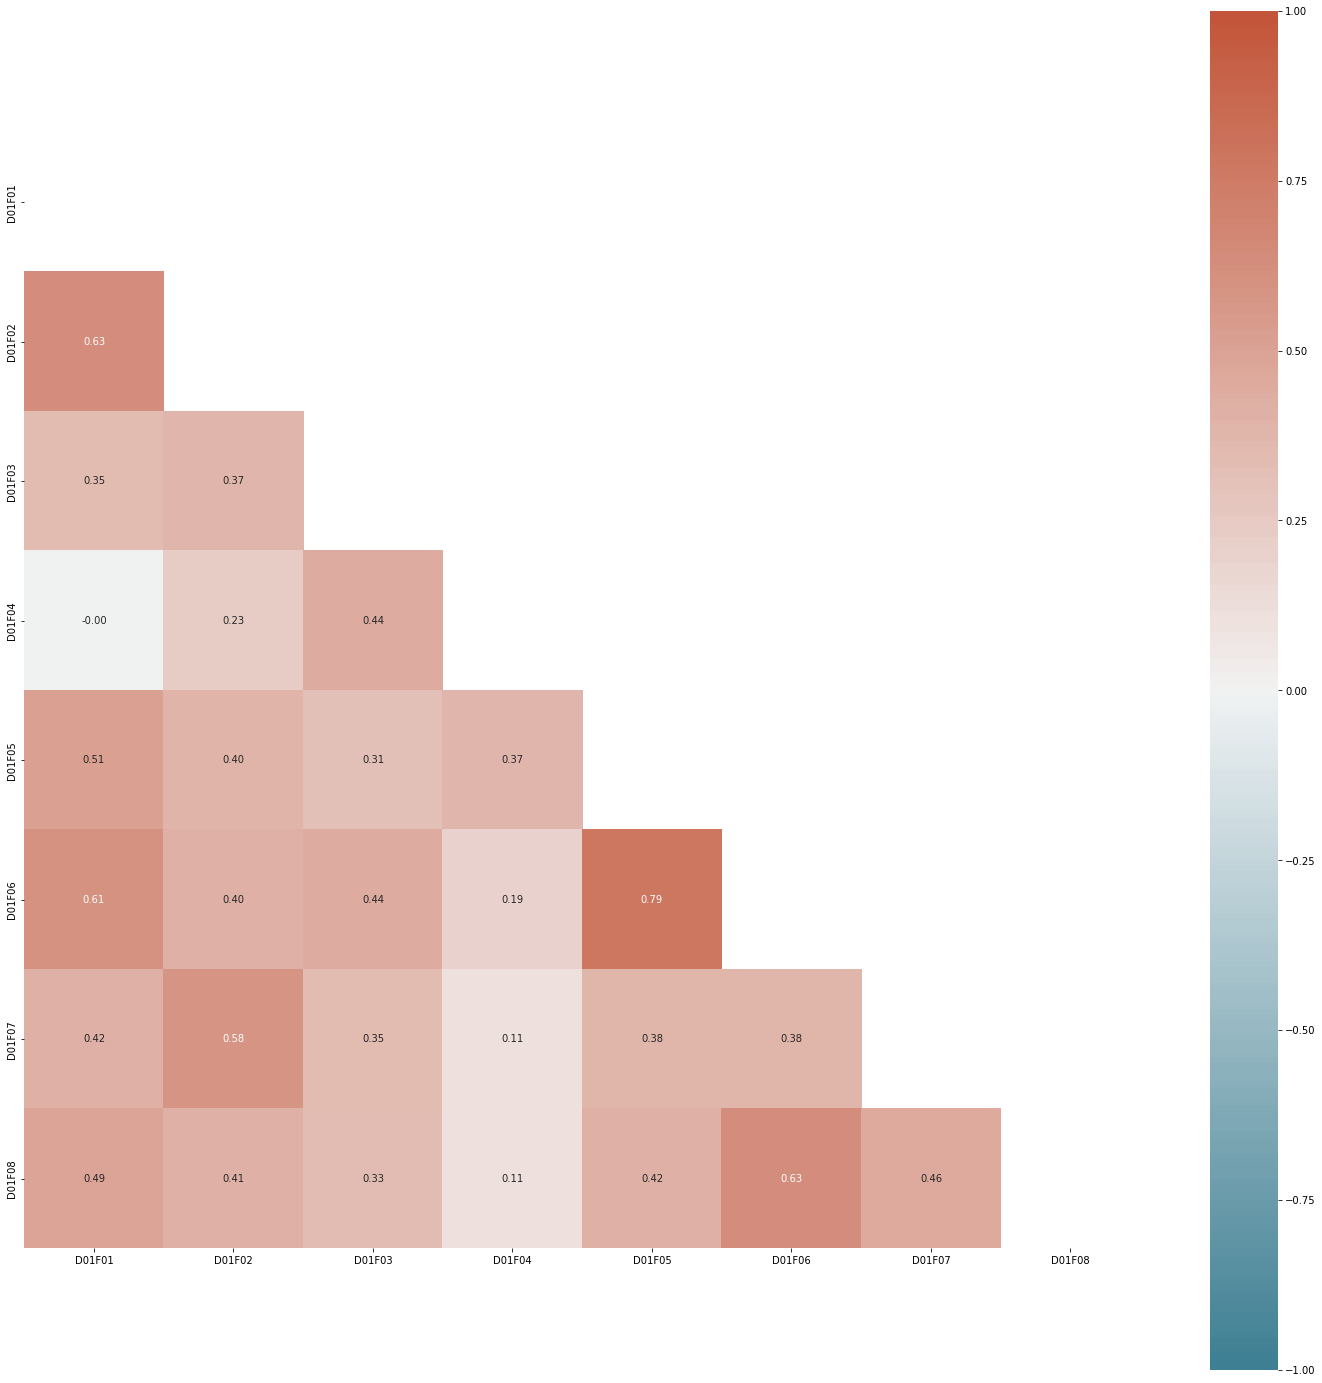

In [18]:
import seaborn as sns

plt.figure(figsize=(25,25))

# plot the heatmap for correlation matrix
corr = df2_fa.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                 mask=mask, square=True, 
                 annot=True, fmt='.2f')

[Text(0, 0.5, 'FA1'), Text(0, 1.5, 'FA2'), Text(0, 2.5, 'FA3')]

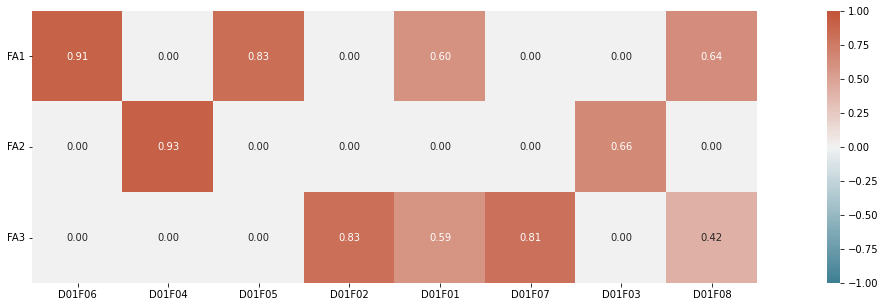

In [19]:
import seaborn as sns

plt.figure(figsize=(25,5))

# plot the heatmap for correlation matrix
ax = sns.heatmap(fa_loading_matrix.drop(['Highest_loading','Communality','New Communality'], 
                 axis=1).T, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                 square=True, annot=True, fmt='.2f')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0)

**f) Only variables with loading of 0.4 are interpreted**

As a rule of thumb, only variables with loading of 0.32 and above are interpreted. The greater the loading, the more the variable is a pure measure of the factor. 

Comrey and Lee (1992) suggest that loadings of:

\>71% (50% overlapping variance) are considered excellent;

\>63% (40% overlapping variance) very good;

\>55% (30% overlapping variance) good;

\>45% (20% overlapping variance) fair;

\<32% (10% overlapping variance) poor;

In [20]:
import numpy as np

fa.fit(df2_fa.values)

print ("Matriz de transformação de componentes")
#fa.corr_
fa.rotation_matrix_

df_rm = pd.DataFrame(fa.rotation_matrix_)
df_t = df_rm.transpose()

df_t.columns = ['FA1', 'FA2', 'FA3']
df_t

#fa = FactorAnalyzer(n_factors=3,rotation='varimax',method='principal', bounds=(0.005, 1), is_corr_matrix=False, impute='drop', svd_method='randomized')
#fa.fit(df1_fa)
#print(pd.DataFrame(fa.loadings_,index=df1_fa.columns))

Matriz de transformação de componentes


,FA1,FA2,FA3
0,0.714489,0.149874,-0.683406
1,-0.328693,0.934186,-0.138771
2,0.617630,0.323781,0.716728


**3.2) Factor Analysis Model**


The amount of variance explained by each factor can be found out using the ‘get_factor_variance’ function.


In [21]:
print("Somas de rotação de carregamentos ao quadrado")

print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var %','Cumulative Var %']))

df_rot =pd.DataFrame(fa.get_factor_variance())
df_rot = df_rot.transpose()

df_rot.columns = ['Total', 'Proportional Var (%)', 'Cumulative Var (%)']
df_rot.loc[df_rot['Proportional Var (%)'] < 1, "Proportional Var (%)"] = df_rot['Proportional Var (%)']*100 
df_rot.loc[df_rot['Cumulative Var (%)'] < 1, "Cumulative Var (%)"] = df_rot['Cumulative Var (%)']*100 

df_rot


Somas de rotação de carregamentos ao quadrado
                           0         1         2
Variance            2.432732  1.478338  2.071606
Proportional Var %  0.304091  0.184792  0.258951
Cumulative Var %    0.304091  0.488884  0.747835


,Total,Proportional Var (%),Cumulative Var (%)
0,2.432732,30.409149,30.409149
1,1.478338,18.479222,48.888371
2,2.071606,25.895080,74.783451


In [22]:
print(pd.DataFrame(fa.get_factor_variance()))


          0         1         2
0  2.432732  1.478338  2.071606
1  0.304091  0.184792  0.258951
2  0.304091  0.488884  0.747835


**a) Variance Explained by Factors**

The first row represents the variance explained by each factor. Proportional variance is the variance explained by a factor out of the total variance. Cumulative variance is nothing but the cumulative sum of proportional variances of each factor. In our case, the 3 factors together are able to explain 74.78% of the total variance.

In unrotated cases, the variances would be equal to the eigenvalues. Rotation changes the distribution of proportional variance but the cumulative variance will remain the same. Oblique rotations allow correlation between the factors while the orthogonal rotations keep the factors uncorrelated.

**b) Communalities**

Communality is the proportion of each variable’s variance that can be explained by the factors. Rotations don’t have any influence over the communality of the variables.



In [23]:
print(pd.DataFrame(fa.get_communalities(),index=df2_fa.columns,columns=['Communalities']))

        Communalities
D01F01       0.713060
D01F02       0.769240
D01F03       0.639147
D01F04       0.870339
D01F05       0.804720
D01F06       0.904574
D01F07       0.700342
D01F08       0.581254


In [24]:

print("The original eigenvalues, The common factor eigenvalues")
print(pd.DataFrame(fa.get_eigenvalues()))

The original eigenvalues, The common factor eigenvalues
          0         1         2         3         4         5         6  \
0  3.886870  1.192863  0.902943  0.631289  0.583008  0.450253  0.230740   
1  3.638258  0.999327  0.691215  0.323874  0.276244  0.125782  0.000382   

          7  
0  0.122033  
1 -0.072405  


**c) Confirmatory Factor Analysis**

In [26]:
import pandas as pd
from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser)

model_dict = df2_fa
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(df2_fa, None)
cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=True, max_iter=250, impute='median', n_obs=None, tol=5, is_cov_matrix=False, bounds=None)
cfa.fit(df2_fa.values)
cfa.loadings_


/usr/local/lib/python3.7/dist-packages/factor_analyzer/confirmatory_factor_analyzer.py:754: UserWarning: The optimization routine failed to converge: ABNORMAL_TERMINATION_IN_LNSRCH
  f"The optimization routine failed to converge: {str(res.message)}"


array([[0.7728846 , 0.77288461, 0.77288461, 0.77288461, 0.77288292,
        0.77288292, 0.77288461, 0.77288461],
       [0.90673979, 0.90673979, 0.90673979, 0.90673979, 0.9067398 ,
        0.9067398 , 0.90673979, 0.90673979],
       [0.52100587, 0.52100587, 0.52100587, 0.52100587, 0.52100587,
        0.52100587, 0.52100587, 0.52100587],
       [0.27958081, 0.27958081, 0.27958081, 0.27958081, 0.27958081,
        0.27958081, 0.27958081, 0.27958081],
       [1.127436  , 1.12743599, 1.12743599, 1.12743599, 1.127436  ,
        1.127436  , 1.12743599, 1.12743599],
       [1.32606186, 1.32606024, 1.32606023, 1.32606023, 1.32606025,
        1.32606025, 1.32606024, 1.32606024],
       [1.07050359, 1.07050359, 1.07050359, 1.07050359, 1.0705036 ,
        1.0705036 , 1.07050359, 1.07050359],
       [0.7912059 , 0.79120589, 0.79120589, 0.79120589, 0.7912059 ,
        0.7912059 , 0.79120589, 0.79120589]])

In [27]:

from sklearn.decomposition import FactorAnalysis

X = df2_fa
fa= FactorAnalysis(n_components=3, tol=5, copy=True, max_iter=5, noise_variance_init=None, svd_method='randomized', iterated_power=1, rotation='varimax', random_state=0)
fa.fit(X)

fa.components_

fa_load = pd.DataFrame(fa.components_)

#fa_load = fa_load.transpose()

fa_load


,0,1,2,3,4,5,6,7
0,0.552644,0.362042,0.344269,0.195446,1.053326,1.233975,0.410203,0.592073
1,0.502663,0.808458,0.339110,0.085403,0.226355,0.297318,0.998384,0.405149
2,0.213441,-0.039638,-0.315032,-0.489088,-0.195324,0.036964,-0.039446,0.134313
